## [E-campus 과제 출결 지킴이]

### 1) 주제 선정 이유

제가 이런 주제를 선정한 계기는 두 가지가 있습니다.

첫 번째로 코로나로 인해서 대부분의 대학교 수업이 비대면 온라인 강의로 바뀌었습니다. 이에 따라서 출결 또한 보통 온라인으로 채점을 진행합니다. 직접 만나서 진행하지 않는다는 점에서 학생들이 출결에 대해 느끼는 부담감과 긴장감은 한층 줄어들기 때문에 이를 더욱 놓치기 쉬워집니다. 이런 어이없는 실수로 감점을 당하는 일들을 방지하기 위해서 프로그램의 필요성을 느꼈습니다.

두 번째로 수업을 들으며 직접 e-campus를 사용하는 입장으로서 사이트의 가독성과 편리성이 매우 떨어진다고 생각합니다. 이미 몇 시간 전에 수강을 완료한 강의에 대한 알림이 강의 하나하나마다 울리는데 이는 다른 중요 출결 및 과제 공지를 종종 놓치게 만듭니다. 이를 제외하더라도 수업 수강 여부를 확인하기 위해서는 강의마다 직접 들어가 확인해야 하는 불편함이 있습니다. 때문에 이런 비효율성을 최소한으로 줄이기 위해서 이번 주제를 선정하게 되었습니다.

### 2) 주제 정의

e-campus를 이용하는 사용자가 앞으로 들어야 할 수업들을 나타내고 경고하는 프로그램을 개발합니다. 사용자가 쉽게 자신의 수업 일정을 얻어 감점을 당하거나 출석을 놓치는 경우를 방지하고자 하는 것이 이 프로젝트의 목적입니다. 사용자는 프로그램에 ID와 PW만 입력하면 쉽게 e-campus에서 자신의 수업 관련 정보를 얻어올 수 있습니다.

### 3) 인터넷을 통한 데이터 획득

e-campus에서 자신이 수강하는 수업의 정보를 얻어내기 위해서는 로그인이라는 인증 과정이 필요하다. 또한, e-campus는 시간이 지나면서 업데이트되는 동적인 웹페이지에서 정보를 얻어와야 하기 때문에 웹사이트 테스트를 위한 도구로 브라우저 동작을 자동화할 수 있는 셀레니움을 이용했습니다. 셀레니움 자동화를 통해서 ID, PW, 과목명을 입력받아 특정 과목의 '강의 콘텐츠'화면에 들어가 강의 수강 상태에 관한 정보를 얻어냈습니다.

강의 콘텐츠에 들어가면 다음 그림과 같이 강의 수강 상태에 관한 정보가 나와있다. 이 HTML 정보들은 iframe에 싸여있다. iframe이란 HTML Inline Frame 요소이며 inline frame의 약자이다. 효과적으로 다른 HTML 페이지를 현재 페이지에 포함시키는 중첩된 브라우저로 iframe 요소를 이용하면 해당 웹 페이지 안에 어떠한 제한 없이 다른 페이지를 불러와서 삽입 할 수 있다. 이에 접근하기 위해서는 frame을 전환하는 과정을 거쳐야 한다. 

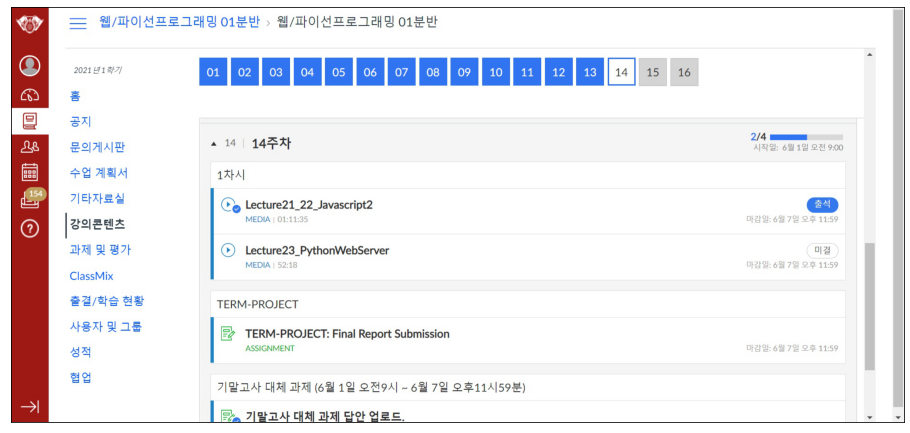

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.xticks([])
plt.yticks([])
img = plt.imread("캡처1.jpg")
plt.imshow(img)
plt.show()

다음 그림과 같이 '모든 주차 펴기'버튼을 눌러야 자세한 강의 정보를 얻어올 수 있다. 하지만 페이지에 들어가면 스크롤이 자동으로 내려오는 동작이 있기 때문에 페이지가 준비된 이후에도 자체적으로 2-3초 정도의 텀을 둬야 한다.

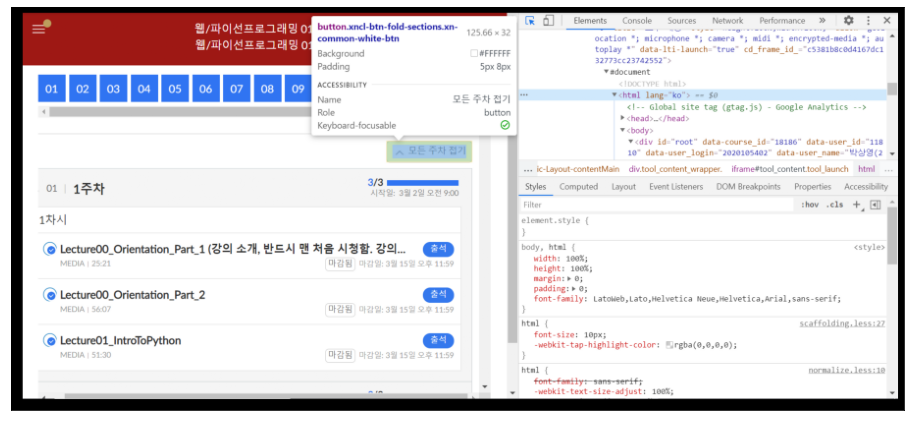

In [2]:
plt.figure(figsize=(16,8))
plt.xticks([])
plt.yticks([])
img = plt.imread("캡처2.PNG")
plt.imshow(img)
plt.show()

### 4) 분석을 위한 데이터의 가공

'강의 콘텐츠' 페이지에서 강의명, n주차, 강의 출석 진행도 등의 정보를 셀레니움의 드라이버를 이용하여 얻어온다. 얻어온 정보를 텍스트로 변환하여 리스트 형태로 저장한다. 강의 출석 진행도를 이용하여 출석이 모두 진행되지 않은 주차를 따로 얻어낸다. 해당 주차의 강의 정보를 딕셔너리로 묶는다.

    학습 진행도와 수업명 등의 정보를 추출
    
    my_count = driver.find_elements_by_class_name("xnslh-section-opendate-count")
    my_total = driver.find_elements_by_class_name("xnslh-section-opendate-total")
    my_section_title = driver.find_elements_by_class_name("xnslh-section-title")
    my_component_title = driver.find_elements_by_class_name("xnci-component-title")

    추출한 정보를 텍스트로 변환 

    count = []
    total = []
    gap = []
    section_title = []
    component_title = []


    for c in my_count:
        count.append(c.text)
    for t in my_total:
        total.append(t.text)
    for s in my_section_title:
        section_title.append(s.text)
    for ct in my_component_title:
        component_title.append(ct.text)
    for i in range(len(count)):
        gap.append(int(total[i])-int(count[i]))

    학습진행도가 불충분한 주차가 언제인지 알아내 리스트 형태로 정리한다.

    x_section_title = []
    x_total = []

    for j in range(len(gap)):
            if gap[j] != 0:
                print(section_title[j]+"에 수강하지 않은 강의가 "+ str(gap[j]) +"개 남아있습니다.")
                x_section_title.append(section_title[j])
                x_total.append(total[j])
    print('\n')

    각 주차에 나타난 total 강의 수를 바탕으로 수업명의 리스트를 각 주차로 나눠진 List in List 형태로 변환한다. 
    
    start = 0
    component_split = []

    for k in total:
        end = start + (int(k))
        component_split.append(component_title[start:end])
        start = end 

    my_dict = dict(zip(section_title,component_split))

### 5) 분석 결과 도출

In [3]:
import time #자체적인 지연시간을 주기 위해서 필요
from selenium import webdriver #동적인 페이지의 웹페이지 크롤링에 핵심이 되는 라이브러리
from selenium.webdriver.common.keys import Keys
import os 
from selenium.webdriver import ActionChains #여러 개의 동작을 체인으로 묶어서 저장하고 실행, 특정 요소로의 스크롤 과정에서 필요함
import getpass #비밀번호 정보 보호를 위해 필요

In [4]:
def getData(ID,PW):
    """
    ID,PW 정보를 입력받아 해당 계정의 e-campus에 접속하여 정보를 얻어내 얻어내고자하는 과목의 수강상태를 나타낸다.
    """
    
    driver = webdriver.Chrome('chromedriver.exe')
    driver.implicitly_wait(time_to_wait=10)
    
    #e-campus 접속
    start_url = "https://e-campus.khu.ac.kr/xn-sso/login.php?auto_login=&sso_only=&cvs_lgn=&return_url=https%3A%2F%2Fe-campus.khu.ac.kr%2Fxn-sso%2Fgw-cb.php%3Ffrom%3D%26login_type%3Dstandalone%26return_url%3Dhttps%253A%252F%252Fe-campus.khu.ac.kr%252Flogin%252Fcallback"
    driver.get(start_url)

    #e-campus 로그인
    driver.find_element_by_name('login_user_id').send_keys(ID)
    driver.find_element_by_name('login_user_password').send_keys(PW)
    driver.find_element_by_xpath('//*[@id="form1"]/div[4]/a').click() 

    driver.find_element_by_xpath('//*[@id="visual"]/div/div[2]/div[2]/div[1]/a').click()
    
    #과목명을 입력받아 해당 과목의 강의 콘텐츠로 이동
    while True: 
        section_choice = input("과목명을 입력하시오 : ")
        try:
            driver.find_element_by_partial_link_text(section_choice).click()
            break
        except:
            print("--> 해당 과목이 존재하지 않습니다. \n")
    
    
    driver.find_element_by_partial_link_text("강의콘텐츠").click()
    time.sleep(2) #페이지 로딩 완료 후에 자동으로 스크롤을 내리는 작업을 자동으로 실행하기에 스크롤 바를 움직이기 위해서는 텀이 필요함
    driver.switch_to.frame("tool_content") #iFrame 처리과정
    driver.maximize_window()#웹페이지 크기 최대화

    #'모든 주차 펴기'버튼을 타겟으로 삼아 스크롤 이동 후 클릭
    target = driver.find_element_by_xpath('//*[@id="xn-course-learn"]/div/div[1]/div[2]/button')
    action = ActionChains(driver)
    action.move_to_element(target).perform()
    target.click()

    #학습 진행도와 수업명 등의 정보를 추출
    my_count = driver.find_elements_by_class_name("xnslh-section-opendate-count")
    my_total = driver.find_elements_by_class_name("xnslh-section-opendate-total")
    my_section_title = driver.find_elements_by_class_name("xnslh-section-title")
    my_component_title = driver.find_elements_by_class_name("xnci-component-title")

    #추출한 정보를 텍스트로 변환 
    count = []
    total = []
    gap = []
    section_title = []
    component_title = []

    for c in my_count:
        count.append(c.text)
    for t in my_total:
        total.append(t.text)
    for s in my_section_title:
        section_title.append(s.text)
    for ct in my_component_title:
        component_title.append(ct.text)
    for i in range(len(count)):
        gap.append(int(total[i])-int(count[i]))

    #학습진행도가 불충분한 주차가 언제인지 알아내 리스트 형태로 정리한다.
    x_section_title = []
    x_total = []

    for j in range(len(gap)):
            if gap[j] != 0:
                print(section_title[j]+"에 수강하지 않은 강의가 "+ str(gap[j]) +"개 남아있습니다.")
                x_section_title.append(section_title[j])
                x_total.append(total[j])
    print('\n')

    #각 주차에 나타난 total 강의 수를 바탕으로 수업명의 리스트를 각 주차로 나눠진 List in List 형태로 변환한다. 
    start = 0
    component_split = []

    for k in total:
        end = start + (int(k))
        component_split.append(component_title[start:end])
        start = end 

    my_dict = dict(zip(section_title,component_split))
    
    #강의 수강 상태를 나타내고 사용자의 선택에 따라 자세한 정보를 알아내도록 한다.
    if len(x_section_title) == 0:
        print("--> 해당 과목은 모든 강의를 수강했습니다. \n")
    elif len(x_section_title) != 0:
        while True:
            player_choice = input("자세한 정보가 궁금하시면 '1', 뒤로 돌아가려면 '2'를 입력해주세요. : ")
            print('\n')
            if player_choice == '1':
                while True: 
                    try:
                        my_choice = input("강의를 확인하려는 주차를 선택하십시오. (ex:1주차) : ")
                        print("--> "+my_choice+"에 해당하는 강의는 다음과 같습니다.\n",my_dict[my_choice])
                        print('\n')
                        break
                    except:
                        print("--> 입력값이 올바르지 않습니다.\n")
            elif player_choice == '2':
                break
            else :
                print("--> 입력값이 올바르지 않습니다.\n")
                
    #모든 작업이 끝나고 브라우저를 닫는다.
    driver.quit()

In [ ]:
def my_program():
    """
    사용자의 선택에 따라 원하는 정보를 얻어낼 수 있도록 한다.
    """
    while True:
        try:
            ID = input("E-campus ID를 입력하시오 : ")
            PW = getpass.getpass("E-campus PW를 입력하시오 : ")
            print("\n")
            while True:
                player_choice = input("계속 진행하길 원하신다면 '1', 그만두길 원하신다면 '2'를 입력해주세요. : ")
                print("\n")
                if player_choice == '1':
                    getData(ID,PW)
                elif player_choice == '2':
                    print("...프로그램을 종료합니다.")
                    break
                else :
                    print("--> 입력값이 올바르지 않습니다. \n")
            break
        except:
            print("ID와 PW를 올바르게 입력해주세요.")
            print("\n")

my_program()

E-campus ID를 입력하시오 : kt010724
E-campus PW를 입력하시오 : ········


계속 진행하길 원하신다면 '1', 그만두길 원하신다면 '2'를 입력해주세요. : 1


과목명을 입력하시오 : 주제
1주차에 수강하지 않은 강의가 2개 남아있습니다.
2주차에 수강하지 않은 강의가 1개 남아있습니다.
3주차에 수강하지 않은 강의가 3개 남아있습니다.
4주차에 수강하지 않은 강의가 2개 남아있습니다.
5주차에 수강하지 않은 강의가 2개 남아있습니다.
6주차에 수강하지 않은 강의가 1개 남아있습니다.
7주차에 수강하지 않은 강의가 2개 남아있습니다.
8주차에 수강하지 않은 강의가 2개 남아있습니다.
10주차에 수강하지 않은 강의가 1개 남아있습니다.
12주차에 수강하지 않은 강의가 1개 남아있습니다.
15주차에 수강하지 않은 강의가 2개 남아있습니다.


자세한 정보가 궁금하시면 '1', 뒤로 돌아가려면 '2'를 입력해주세요. : 1


강의를 확인하려는 주차를 선택하십시오. (ex:1주차) : 15
--> 입력값이 올바르지 않습니다.

강의를 확인하려는 주차를 선택하십시오. (ex:1주차) : 15주차
--> 15주차에 해당하는 강의는 다음과 같습니다.
 ['15주차', '15주차']


자세한 정보가 궁금하시면 '1', 뒤로 돌아가려면 '2'를 입력해주세요. : 1


강의를 확인하려는 주차를 선택하십시오. (ex:1주차) : 15주차
--> 15주차에 해당하는 강의는 다음과 같습니다.
 ['15주차', '15주차']




### 6) 결론

강의와 과제의 수행 여부를 알아내기 위해서는 e-campus에 직접 들어가 각 과목마다 매번 확인해야 하는 불편함을 이 프로그램을 통해서 덜어낼 수 있게 했습니다. 사용자는 그저 이 프로그램을 실행하여 ID,PW 정도의 간단한 정보만 입력하면 손쉽게 학습 진행도를 확인해 결석이나 과제 미제출과 같은 불상사를 피할 수 있습니다. 결론적으로 사용자는 이 프로그램을 통해서 온라인 학습이 활발하게 활성화된 현재의 대학 시스템에 효율적이고 효과적으로 적응할 기회를 얻을 것입니다.

### 7) 참고문헌

라이언 미첼, "파이썬으로 웹 크롤러 만들기", 한빛미디어(2016)

### 8,9) 별첨

경우에 따라 정보가 달라지는 동적인 웹페이지에서 정보를 얻어오기 때문에 데이터 원본을 제공할 수 없습니다.

### 10) 별첨

    학습 진행도와 수업명 등의 정보를 추출
    
    my_count = driver.find_elements_by_class_name("xnslh-section-opendate-count")
    my_total = driver.find_elements_by_class_name("xnslh-section-opendate-total")
    my_section_title = driver.find_elements_by_class_name("xnslh-section-title")
    my_component_title = driver.find_elements_by_class_name("xnci-component-title")

    추출한 정보를 텍스트로 변환 

    count = []
    total = []
    gap = []
    section_title = []
    component_title = []


    for c in my_count:
        count.append(c.text)
    for t in my_total:
        total.append(t.text)
    for s in my_section_title:
        section_title.append(s.text)
    for ct in my_component_title:
        component_title.append(ct.text)
    for i in range(len(count)):
        gap.append(int(total[i])-int(count[i]))